# Ethereum Price Trend Exploratory Data Analysis
Ethereum is a decentralized, open-source blockchain with smart contract functionality. Ether is the native cryptocurrency of the platform. After Bitcoin, it is the largest cryptocurrency by market capitalization. Ethereum was invented in 2013 by programmer Vitalik Buterin. Although it was invented in 2013, the initial release date was July 30, 2015. The dataset with which we are working now has the prices from 07-08-2015 to 26-07-2021.

In [4]:
import pandas as pd
import numpy as np

## Data Preparation & Cleaning
We will do the following tasks now:
- Load the file using pandas
- Look at the informations about the file
- Fix any missing or incorrect values

We don't need the `Adj Close` column. So, we will remove that.

In [5]:
df = pd.read_csv('ETH-USD.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2176,2021-07-22,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,1.749548e+10
2177,2021-07-23,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,1.620039e+10
2178,2021-07-24,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,1.605745e+10
2179,2021-07-25,2187.145508,2194.438232,2108.829834,2191.373779,2191.373779,1.456648e+10
2180,2021-07-26,2177.329590,2384.400635,2177.329590,2340.090820,2340.090820,2.389353e+10


In [6]:
df.shape

(2181, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2.177000e+03
mean,398.054460,413.880550,380.314871,399.066543,399.066543,7.125412e+09
std,618.185352,646.694116,585.147027,619.488385,619.488385,1.065180e+10
min,0.431589,0.482988,0.420897,0.434829,0.434829,1.021280e+05
25%,13.864300,14.373900,13.254300,13.883900,13.883900,3.911200e+07
50%,200.608871,206.361450,194.783997,200.634995,200.634995,2.201160e+09
75%,391.488617,405.616364,381.273834,392.189972,392.189972,9.818257e+09
max,4174.635742,4362.350586,3785.848633,4168.701172,4168.701172,8.448291e+10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2181 non-null   object 
 1   Open       2177 non-null   float64
 2   High       2177 non-null   float64
 3   Low        2177 non-null   float64
 4   Close      2177 non-null   float64
 5   Adj Close  2177 non-null   float64
 6   Volume     2177 non-null   float64
dtypes: float64(6), object(1)
memory usage: 119.4+ KB


In [9]:
df.isna().sum().sort_values() # These are negligible

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [14]:
df = df.drop(columns=('Adj Close'))

In [15]:
df

,Date,Open,High,Low,Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,1.643290e+05
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,6.741880e+05
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06
...,...,...,...,...,...,...
2176,2021-07-22,1994.822876,2044.116455,1954.297852,2025.202759,1.749548e+10
2177,2021-07-23,2025.105713,2129.441162,2000.436279,2124.776611,1.620039e+10
2178,2021-07-24,2123.961182,2197.649414,2107.323486,2189.218750,1.605745e+10
2179,2021-07-25,2187.145508,2194.438232,2108.829834,2191.373779,1.456648e+10


## Exploratory Analysis & Visualization

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

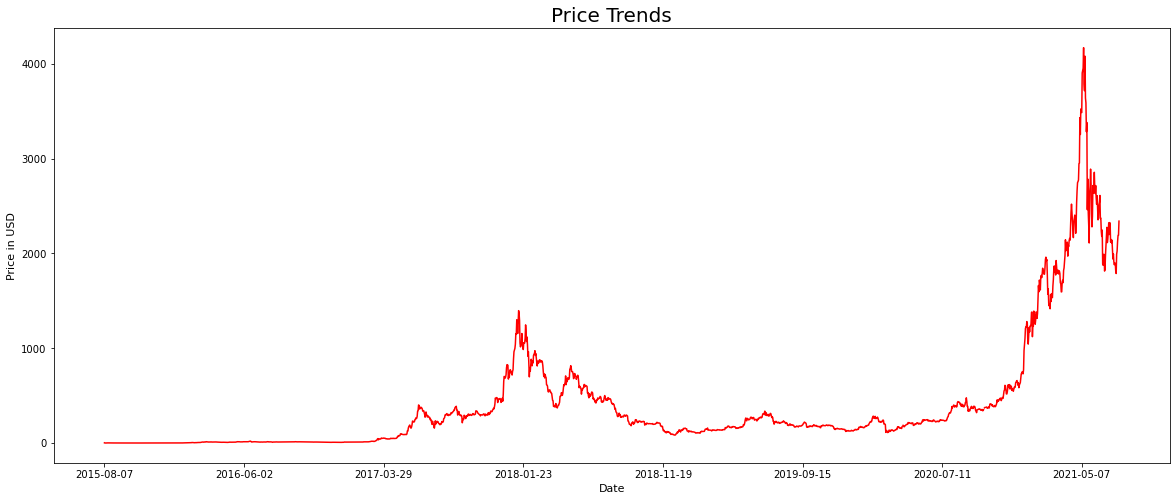

In [9]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Price Trends', fontsize='20')
plt.show()

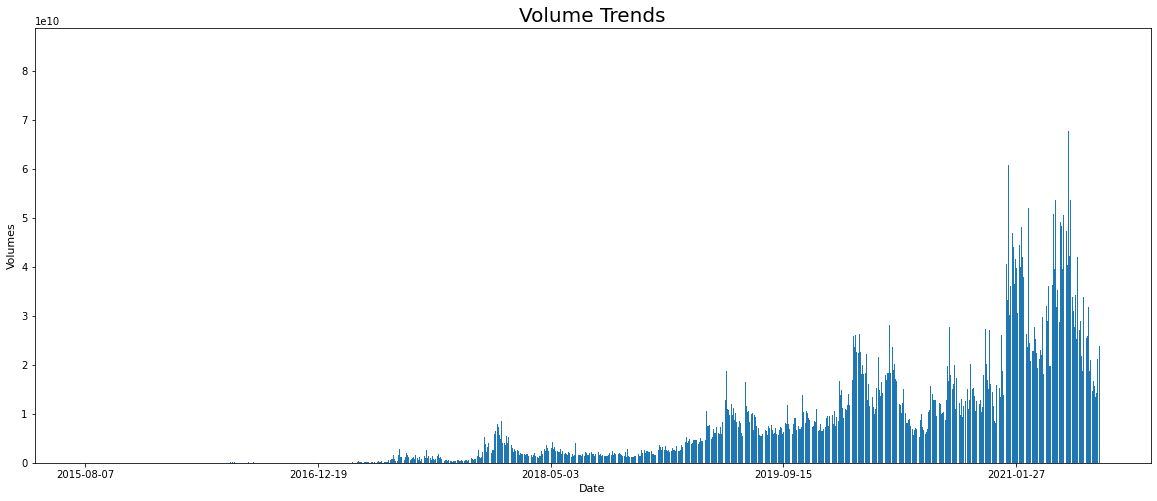

In [10]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df['Date'], df['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.set_yscale('log')
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.show()

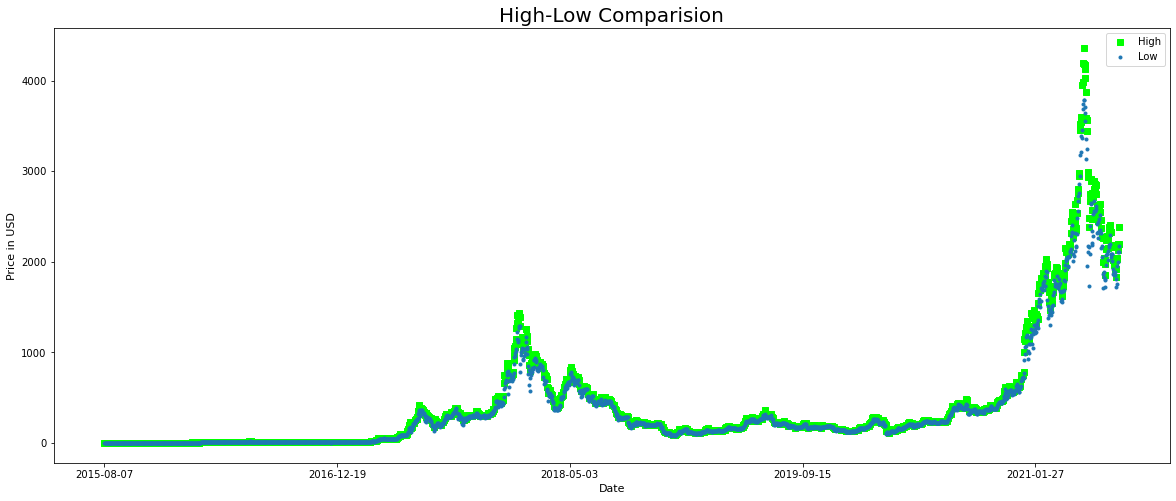

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['Date'], df['High'], marker=',', color='lime')
ax.scatter(df['Date'], df['Low'], marker='.') #orange
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
ax.legend(['High', 'Low'])
plt.title('High-Low Comparision', fontsize='20')
plt.show()

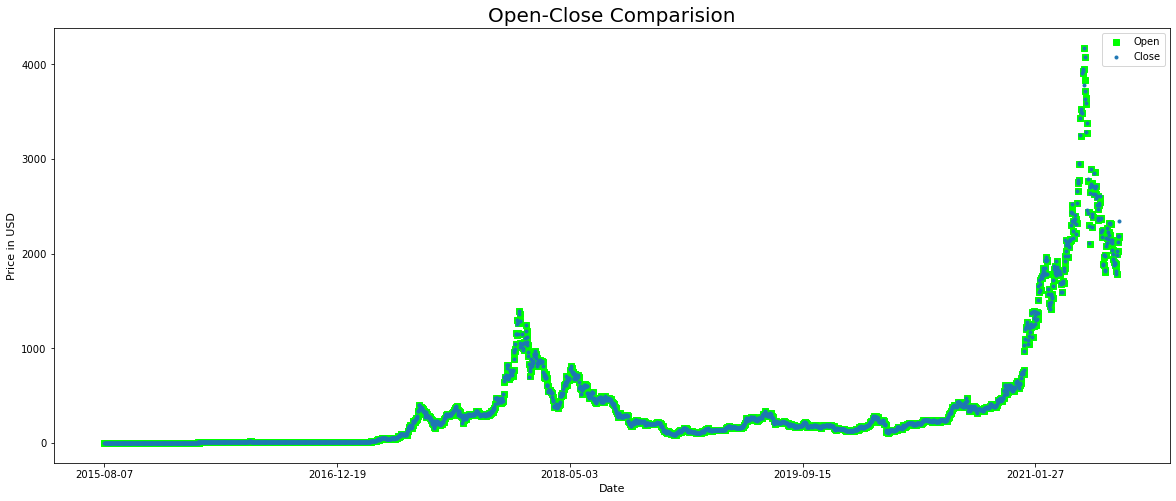

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['Date'], df['Open'], marker=',', color='lime')
ax.scatter(df['Date'], df['Close'], marker='.') #orange
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
ax.legend(['Open', 'Close'])
plt.title('Open-Close Comparision', fontsize='20')
plt.show()

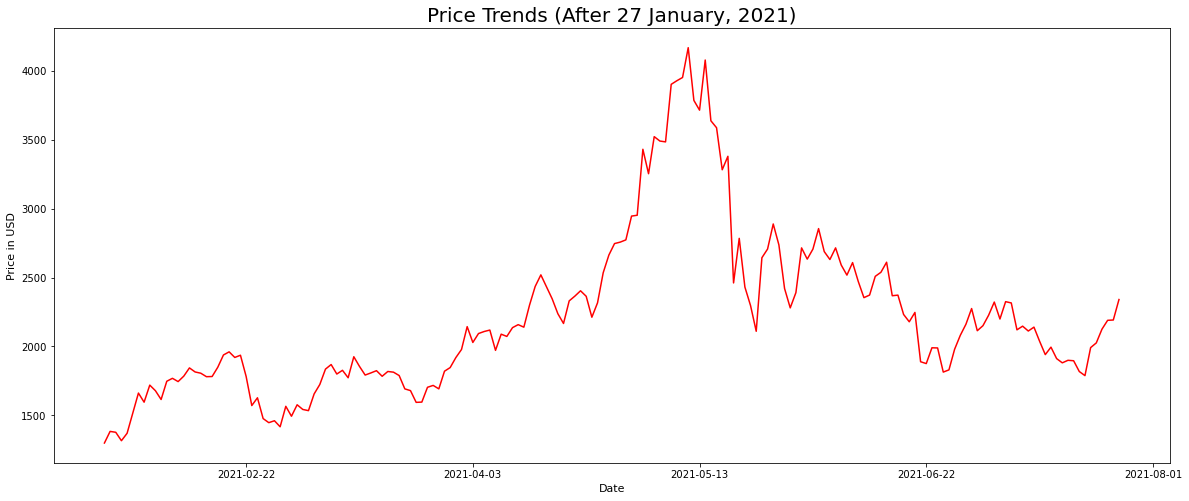

In [18]:
ohlc = df[(df['Date'] > '2021-01-27')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Price Trends (After 27 January, 2021)', fontsize='20')
plt.show()

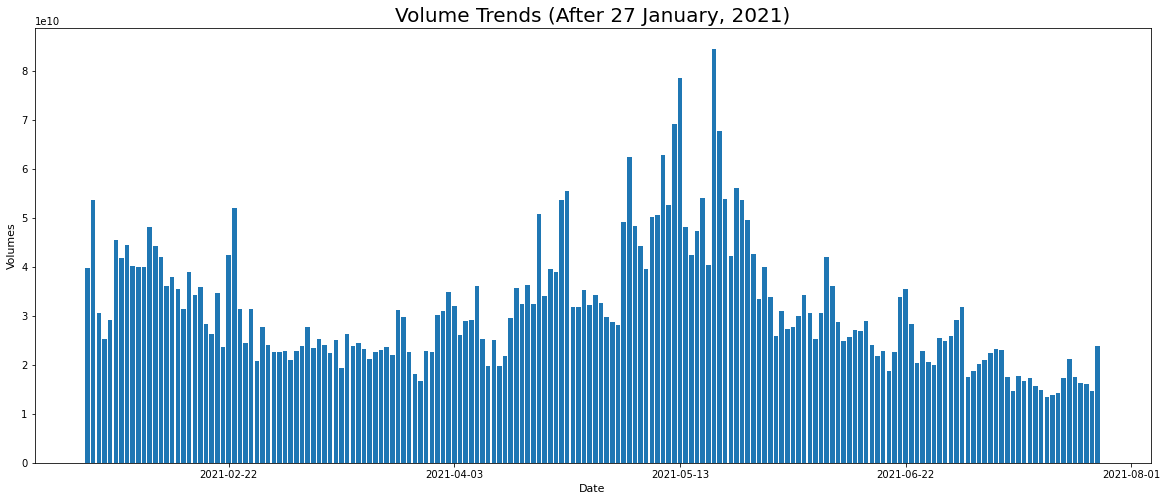

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

ohlc = df[(df['Date'] > '2021-01-27')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(ohlc['Date'], ohlc['Volume']) #color='Red'
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends (After 27 January, 2021)', fontsize='20')
plt.show()

In [24]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

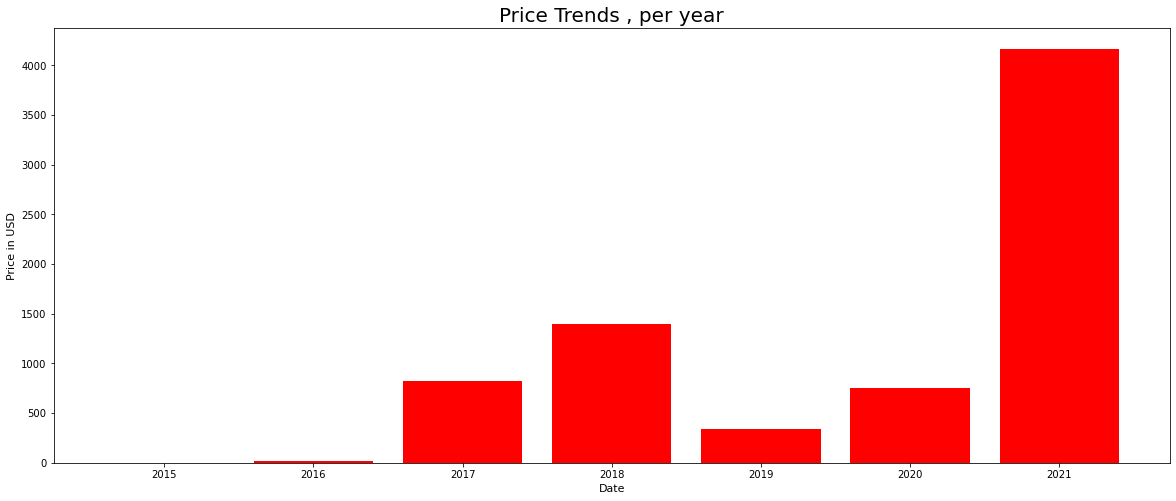

In [31]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df['year'], df['Close'], color='Red')
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Price Trends , per year', fontsize='20')
plt.show()

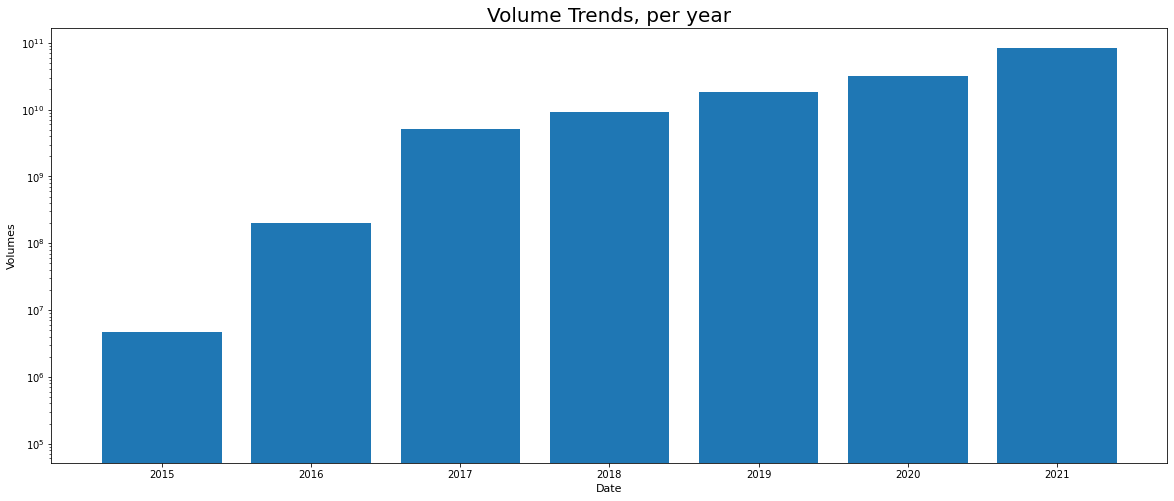

In [30]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df['year'], df['Volume'])
ax.set_yscale('log')
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends, per year', fontsize='20')
plt.show()

In [81]:
df.iloc[df['Close'].argmax()]

Date         2021-05-11 00:00:00
Open                 3948.271973
High                 4178.208984
Low                  3783.889404
Close                4168.701172
Adj Close            4168.701172
Volume             52679737865.0
year                        2021
month                          5
Name: 2104, dtype: object

In [82]:
df.iloc[df['Volume'].argmax()]

Date         2021-05-19 00:00:00
Open                 3382.657227
High                 3437.935791
Low                  1952.460205
Close                2460.679199
Adj Close            2460.679199
Volume             84482912776.0
year                        2021
month                          5
Name: 2112, dtype: object

## Ask and Answer Questions
- Was there any jump of price of ethereum? If so then why?
> During the first week of May, 2021, the price of ethereum jumped from around 2500 usd to 4000 usd. Which is a huge jump. I was probably because the rise of NFTs.
- From which to which period the ethereum price was all-time low?
> As per the year, during 2015 it was the all-time lowest. But it's obvious.
- What does the volume column mean?
> The volume of a particular Cryptocurrency found on a Coin Prices Index page is simply the total amount of coins traded in the last 24 hours. The volume of a coin seen on a particular Exchange is the total volume of this coin in this Exchange only, unless it says otherwise. The 24h Vol that we see on the top spot of the CoinMarketCap website is the total amount of all tokens traded in the last 24 hours. To know more, visit here: https://analyzingalpha.com/open-high-low-close-stocks
- What's the relationship between the price jump and number of volumes?
> If we observe the graph of the price trends and volume trends, then we'll see that both we almost directly proportional.

## Summary and Conclusion
We see from the above analysis that May, 2021 was the best time for selling ethereum as the prices jumped during the time. If we see the yearly relationship between the price and volume of ethereum, we'll see that the price was not consistent at all but the volumes were well consistent throughout the year with a good rise. Although from the first quarter of 2021, number of volumes also jumped. Thats because of the price jump of the ethereum. As I'm not a financial expert I lack certain aspects of such datasets, but the analysis I made, I think would be helpful for understanding certain aspects of ethereum. 